## Training the ML algorithm

In [1]:
import SMEFT19

In [2]:
d = SMEFT19.ellipse.load('../../ellipses/rotBII.yaml')

In [3]:
ML = SMEFT19.ml.train(['../../samples/randompoints.dat', '../../samples/samplealbl.dat', '../../samples/sampleaqbq.dat'],
                 '../../samples/validationpoints.dat', '../../MLmodels/xgb_lh.json', d['bf'], headers=0)

0.6555325116199011


## Linear regression

Here we check that the ML approximation correctly reproduces the likelihood of the datapoints

(0.9710853265238792, 0.0)

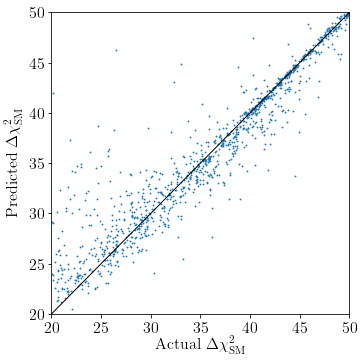

In [4]:
SMEFT19.ml.regr(ML, '../../samples/validationpoints.dat', '../../plots/regression_xgb')

## Distribution

Now we generate a small sample of points with a Montecarlo algorithm using the ML-approximation of the likelihood

In [11]:
newpoints = ML.newpoints(500)
df = pd.DataFrame(newpoints)
preds = ML.model.predict(df)

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np

And compare the resulting histogram with the p.d.f of a $\chi^2$ distribution with 5 degrees of freedom

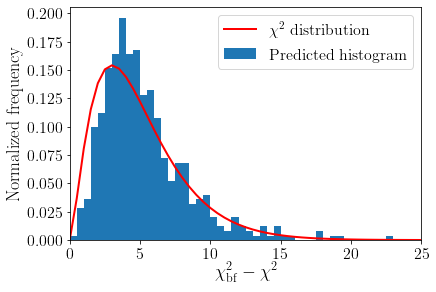

In [29]:
_ = plt.hist(2*max(preds) - 2*preds, bins=50, range=(0,25), density=True, label='Predicted histogram')
plt.plot(np.linspace(0,25,51), chi2(5).pdf(np.linspace(0,25,51)), label=r'$\chi^2$ distribution', lw=2, c='r')
plt.xlim([0,25])
plt.xlabel(r'$\chi^2_\mathrm{bf} - \chi^2$', fontsize=18)
plt.ylabel('Normalized frequency', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout(pad=0.5)
plt.savefig('../../plots/hist_xgb.pdf')
plt.savefig('../../plots/hist_xgb.pgf')